In [12]:
import numpy as np
import pandas as pd

import sys
sys.path.append("..")
from config import args


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm
l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from baseline import *

## Choose metric and data model

In [14]:
loss = 'tau_ols'
model = 'dlvm'

save_plots = False

## Load data

In [18]:
# Multiple imputation results
df_mice = load_results('2019-10-24_exp_mi.csv')
df_mice['algo'] = 'mice'
df_mice = df_mice[['model','n','p','prop_miss','seed','method','citcio','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

df_mice_all = df_mice.copy()
df_mice.head()

results.shape (480, 20)


,model,n,p,prop_miss,seed,method,citcio,tau_dr,tau_ols,tau_ols_ps,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,5,0.1,0,glm,False,1.097757,1.096392,1.097914,0.097757,0.096392,0.097914,mice
1,dlvm,1000,100,0.1,0,glm,False,1.044572,1.043477,1.045678,0.044572,0.043477,0.045678,mice
2,dlvm,5000,5,0.1,0,glm,False,1.071130,1.073666,1.080702,0.071130,0.073666,0.080702,mice
3,dlvm,5000,100,0.1,0,glm,False,1.085659,1.075437,1.077248,0.085659,0.075437,0.077248,mice
4,dlvm,1000,5,0.3,0,glm,False,1.089423,1.089637,1.090258,0.089423,0.089637,0.090258,mice


In [19]:
df = load_results('exp_29.1_10_small.csv_temp')
df['num_samples_zmul']=200

df_ = load_results('exp_04.1_11_small.csv_temp')
df_ = df_[list(set(df_.columns) -set(['res_tau_resid','mul_res_tau_resid', 'm']))]
df_['num_samples_zmul']=200
df_ = df_[df.columns]

df_b = load_results('exp_07.1_11_B.csv_temp')
df_b = df_b[list(set(df_b.columns) -set(['res_tau_resid','mul_res_tau_resid', 'm']))]
df_b = df_b[df.columns]

df = pd.concat((df,df_,df_b))

#df = load_results('exp_15.2_10_choux_temp.csv')
#df['citcio'] = False
#df['dcor_zhat'] = np.nan
#df['dcor_zhat_mul'] = np.nan
#df['add_wy'] = False
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 


# columns = df.columns.tolist()
# columns_reduced = list(set(columns) - set(['mul_tau_dr','mul_tau_ols','mul_tau_ols_ps']))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

#tt = list(set(df_.columns[:list(df_.columns).index('mul_tau_dr')]))
tt = ['model', 'n', 'd','p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 'num_samples_zmul',
              'tau_dr', 'tau_ols', 'tau_ols_ps']
tt.extend(list(['|1-tau_dr|','|1-tau_ols|','|1-tau_ols_ps|','dcor_zhat','dcor_zhat_mul','algo']))

df_ = df_[tt]

df = df[tt]

df = pd.concat([df, df_])

df = df[list(['model','n', 'd', 'p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 'num_samples_zmul',
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', '|1-tau_ols_ps|', 'algo'])]
df.head()
#df.columns.tolist()

results.shape (374, 24)
results.shape (534, 27)
results.shape (150, 28)


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,...,num_samples_zmul,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,...,200,1.081424,1.081779,1.081908,0.499922,0.119565,0.081424,0.081779,0.081908,MDC.process
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,...,200,1.001166,1.001854,0.999689,0.706796,0.663552,0.001166,0.001854,0.000311,MDC.process
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,...,200,1.103148,1.103060,1.109032,0.412992,0.105296,0.103148,0.103060,0.109032,MDC.process
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,...,200,0.994866,0.993980,0.995914,0.690837,0.595437,0.005134,0.006020,0.004086,MDC.process
4,dlvm,1000,3,5,0.0,0,3,10,0.1,glm,...,200,1.077038,1.076966,1.074978,0.525174,0.127417,0.077038,0.076966,0.074978,MDC.process


In [20]:
df_all = df.copy()

In [21]:
df = df_all.loc[df_all['model']==model]
df_mice = df_mice_all.loc[df_mice_all['model']==model]

## DCOV

In [945]:
df = load_results('exp_29.1_10_small.csv_temp')
#df = load_results('exp_15.2_10_choux_temp.csv')
#df['citcio'] = False
#df['dcor_zhat'] = np.nan
#df['dcor_zhat_mul'] = np.nan
#df['add_wy'] = False
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 


columns = df.columns.tolist()
columns_reduced = list(set(columns) - set(['mul_tau_dr','mul_tau_ols','mul_tau_ols_ps']))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

tt = list(set(df_.columns[:list(df_.columns).index('mul_tau_dr')]))
tt.extend(list(['|1-tau_dr|','|1-tau_ols|','|1-tau_ols_ps|','dcor_zhat','dcor_zhat_mul','algo']))
df_ = df_[tt]

df = df[tt]

df = pd.concat([df, df_])

df = df[list(['model','n', 'd', 'p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', '|1-tau_ols_ps|', 'algo'])]
df.head()

results.shape (76, 24)


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,...,add_wy,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,...,True,1.081424,1.081779,1.081908,0.499922,0.119565,0.081424,0.081779,0.081908,MDC.process
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,...,True,1.001166,1.001854,0.999689,0.706796,0.663552,0.001166,0.001854,0.000311,MDC.process
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,...,True,1.103148,1.103060,1.109032,0.412992,0.105296,0.103148,0.103060,0.109032,MDC.process
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,...,True,0.994866,0.993980,0.995914,0.690837,0.595437,0.005134,0.006020,0.004086,MDC.process
4,dlvm,1000,3,5,0.0,0,3,10,0.1,glm,...,True,1.077038,1.076966,1.074978,0.525174,0.127417,0.077038,0.076966,0.074978,MDC.process


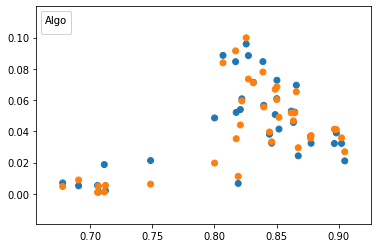

In [949]:
loss = '|1-tau_dr|'
df_ = df.copy()
df_ = df_.loc[(df_['p'] == 100)]
df_ = df_.loc[df_['model']=="dlvm"]
#df_ = df_.loc[df_['add_wy'] == False]
df_ = df_.loc[df_['citcio'] == False] 
#df_ = df_.loc[df_['n_epochs'] == 400] 
#df_ = df_.loc[df_['sig_prior']== 0.1]
#df_ = df_.loc[df_['prop_miss'] == 0.1]


#sns.swarmplot(x='dcor_zhat', y=loss, hue = 'algo', data=df_)

colors = {'MDC.process':'tab:blue', 'MDC.mi':'tab:orange'}

fig, ax = plt.subplots()
scatter = ax.scatter(df_['dcor_zhat'], y=df_[loss], c=df_['algo'].apply(lambda x: colors[x]))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Algo")
ax.add_artist(legend1)

plt.show()


# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# corr = df_[list(['dcor_zhat', '|1-tau_dr|', '|1-tau_ols|'])].corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr, mask=mask, center=0, #, cmap=cmap
#                 square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.title('Correlation between dcor(Zhat) and bias')